## ALP Data Mining
- Valencia Melita Christy - 0706022210007
- Juan Hubert Liem - 0706022210013

### **About the Dataset**

A student depression dataset typically contains data aimed at analyzing, understanding, and predicting depression levels among students. It may include features such as demographic information (age, gender), academic performance (grades, attendance), lifestyle habits (sleep patterns, exercise, social activities), mental health history, and responses to standardized depression scales.

These datasets are valuable for research in psychology, data science, and education to identify factors contributing to student depression and to design early intervention strategies. Ethical considerations like privacy, informed consent, and anonymization of data are crucial in working with such sensitive information.


---

### **Metadata**

1. id: Unique identifier for each individual.
2. Gender: Gender of the individual.
3. Age: Age of the individual.
4. City: Geographic region or city where the individual resides.
5. Profession: Current occupation or primary activity (e.g., student, employee).
6. Academic Pressure: Self-reported level of academic-related stress or pressure.
7. Work Pressure: Self-reported level of work-related stress or pressure.
8. CGPA: Grade Point Average or similar academic performance indicator.
9. Study Satisfaction: Level of satisfaction with academic progress.
10. Job Satisfaction: Level of satisfaction with job or professional work.
11. Sleep Duration: Average daily sleep duration in hours.
12. Dietary Habits: Self-reported quality and regularity of dietary habits.
13. Degree: Highest educational qualification attained or currently pursued.
14. Have you ever had suicidal thoughts?: Binary response indicating if the individual has ever experienced suicidal thoughts (Yes/No).
15. Work/Study Hours: Average number of hours spent working or studying daily.
16. Financial Stress: Self-reported level of financial strain or stress.
17. Family History of Mental Illness: Binary response indicating if there is a family history of mental health issues (Yes/No).
18. Depression: Target variable indicating if the individual is experiencing depression (Yes/No)

### Import Libraries

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
!pip install kneed
from kneed import KneeLocator
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
import sys

### Load Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/valenciamelita/Data-Mining-2024/refs/heads/main/ALP%20Data%20Mining/Student%20Depression%20Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


### Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


There are some null values in Financial Stress column, let's drop them.

In [ ]:
df = df.dropna()
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df = df.drop(columns=['id'])
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:

for column in df.columns:
  print(f"Value counts for column '{column}':")
  print(df[column].value_counts())
  print("-" * 20)

Value counts for column 'Gender':
Gender
Male      15546
Female    12352
Name: count, dtype: int64
--------------------
Value counts for column 'Age':
Age
24.0    2258
20.0    2236
28.0    2133
29.0    1949
33.0    1893
25.0    1784
21.0    1726
23.0    1645
18.0    1587
19.0    1560
34.0    1468
27.0    1462
31.0    1427
32.0    1261
22.0    1160
26.0    1155
30.0    1145
35.0      10
38.0       8
36.0       7
42.0       4
48.0       3
39.0       3
43.0       2
46.0       2
37.0       2
49.0       1
51.0       1
44.0       1
59.0       1
54.0       1
58.0       1
56.0       1
41.0       1
Name: count, dtype: int64
--------------------
Value counts for column 'City':
City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1065
Jaipur                1036
Patna                 

Some of the columns has low counts, so we decided to drop the low counts.

In [ ]:
# Removing some cities
cities_to_remove = df['City'].value_counts()[df['City'].value_counts() < 400]
df = df[~df['City'].isin(cities_to_remove.index)]
print(df['City'].value_counts())

City
Kalyan           1570
Srinagar         1372
Hyderabad        1339
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1065
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          684
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64


In [ ]:
# Removing age
#ages_to_remove = df['Age'].value_counts()[df['Age'].value_counts() < 20]
#df = df[~df['Age'].isin(ages_to_remove.index)]
#print(df['Age'].value_counts())

In [ ]:
# Removing Profession due to majority are students & no work pressure or job satisfaction
df = df.loc[df['Profession'] == 'Student']
print(df['Profession'].value_counts())
df = df.drop(['Profession'], axis=1)
df = df.drop(['Work Pressure'], axis=1)
df = df.drop(['Job Satisfaction'], axis=1)

Profession
Student    27841
Name: count, dtype: int64


In [ ]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
# Removing 'Others' & 0 in some columns because low counts

df = df.loc[df['Academic Pressure'] > 0]
print(df['Academic Pressure'].value_counts())
df = df.loc[df['Study Satisfaction'] > 0]
print(df['Study Satisfaction'].value_counts())
df = df.loc[df['Sleep Duration'] != 'Others']
print(df['Sleep Duration'].value_counts())
df = df.loc[df['Dietary Habits'] != 'Others']
print(df['Dietary Habits'].value_counts())
df = df.loc[df['Degree'] != 'Others']
print(df['Degree'].value_counts())

Academic Pressure
3.0    7440
5.0    6283
4.0    5146
1.0    4795
2.0    4168
Name: count, dtype: int64
Study Satisfaction
4.0    6346
2.0    5827
3.0    5807
1.0    5435
5.0    4414
Name: count, dtype: int64
Sleep Duration
Less than 5 hours    8289
7-8 hours            7325
5-6 hours            6167
More than 8 hours    6030
Name: count, dtype: int64
Dietary Habits
Unhealthy    10283
Moderate      9890
Healthy       7626
Name: count, dtype: int64
Degree
Class 12    6064
B.Ed        1858
B.Com       1502
B.Arch      1475
BCA         1428
MSc         1183
B.Tech      1151
MCA         1038
M.Tech      1019
BHM          921
BSc          883
M.Ed         817
B.Pharm      808
M.Com        733
BBA          695
MBBS         693
LLB          669
BE           608
BA           594
M.Pharm      580
MD           568
MBA          560
MA           542
PhD          519
LLM          480
MHM          191
ME           185
Name: count, dtype: int64


In [ ]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.loc[df['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB|MBBS', regex=True), 'Group_Degree'] = 'Undergraduate'
df.loc[df['Degree'].str.contains(r'MSc|MCA|M.Tech|M.Com|M.Ed|MBA|M.Pharm|MA|MD|LLM|MHM|ME|PhD', regex=True), 'Group_Degree'] = 'Postgraduate and Doctoral'
df.loc[df['Degree'] == 'Class 12', 'Group_Degree'] = 'School'

df['Group_Degree'].value_counts()

,count
Group_Degree,
Undergraduate,13285
Postgraduate and Doctoral,8415
School,6064


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27764 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27764 non-null  object 
 1   Age                                    27764 non-null  float64
 2   City                                   27764 non-null  object 
 3   Academic Pressure                      27764 non-null  float64
 4   CGPA                                   27764 non-null  float64
 5   Study Satisfaction                     27764 non-null  float64
 6   Sleep Duration                         27764 non-null  object 
 7   Dietary Habits                         27764 non-null  object 
 8   Degree                                 27764 non-null  object 
 9   Have you ever had suicidal thoughts ?  27764 non-null  object 
 10  Work/Study Hours                       27764 non-null  float64
 11  Financi

### Visualization

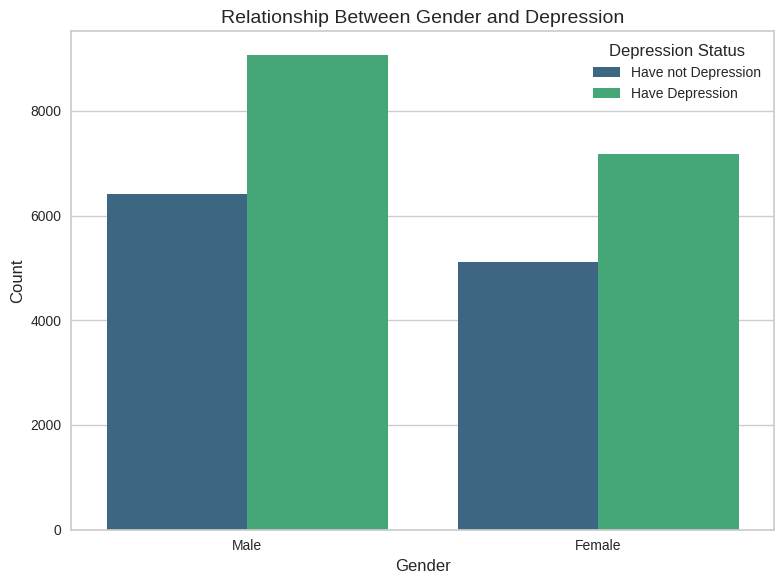

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="Gender",
    hue="Depression",
    palette="viridis"
)
plt.title("Relationship Between Gender and Depression", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Depression Status", labels=["Have not Depression", "Have Depression"])
plt.tight_layout()
plt.show()

Based on the graph, it can be observed that gender differences are not a definitive factor in determining whether an individual has experienced depression. Both males and females show significant proportions of individuals who have reported having such thoughts. However, the data reveals that the number of males reporting depression is higher compared to females. This indicates that while both genders face mental health challenges, males may have a slightly greater tendency to experience depression

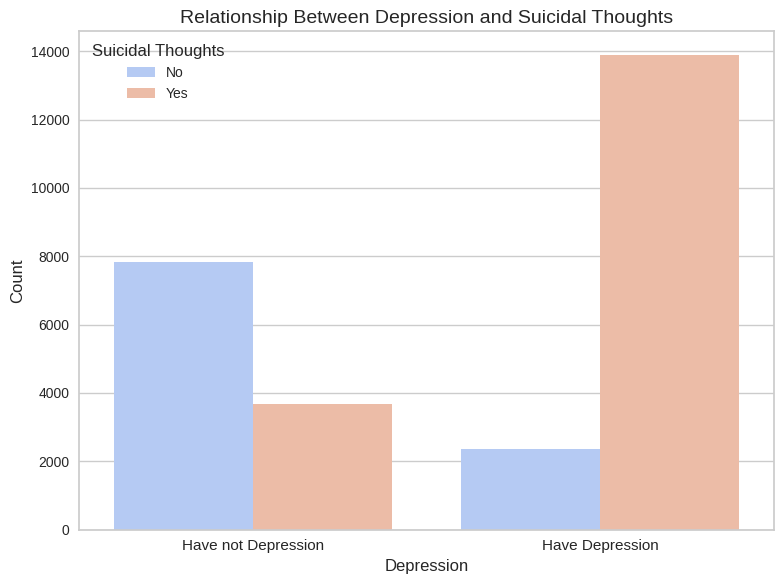

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Depression", hue="Have you ever had suicidal thoughts ?", palette="coolwarm")
plt.title("Relationship Between Depression and Suicidal Thoughts", fontsize=14)
plt.xlabel("Depression", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Have not Depression", "Have Depression"], fontsize=11)
plt.legend(title="Suicidal Thoughts")
plt.tight_layout()
plt.show()

The graph above presents an intriguing data for analysis. Based on the data, there are several individuals who do not experience depression but still have suicidal thoughts, and this number is not insignificant. However, the majority of individuals who suffer from depression tend to have suicidal thoughts. This highlights the critical importance of providing appropriate mental health care and support for individuals experiencing depression.

In [ ]:
#Encoding with Mapping
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Sleep Duration'] = df['Sleep Duration'].map({'Less than 5 hours': 0, '5-6 hours': 1, '7-8 hours': 2, 'More than 8 hours': 3})
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
df['Group_Degree'] = df['Group_Degree'].map({'School': 0, 'Postgraduate and Doctoral': 2, 'Undergraduate': 1})

df.head()


,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Group_Degree
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,1,2,B.Pharm,1,3.0,1.0,0,1,1
1,1,24.0,Bangalore,2.0,5.90,5.0,1,1,BSc,0,3.0,2.0,1,0,1
2,0,31.0,Srinagar,3.0,7.03,5.0,0,2,BA,0,9.0,1.0,1,0,1
3,1,28.0,Varanasi,3.0,5.59,2.0,2,1,BCA,1,4.0,5.0,1,1,1
4,1,25.0,Jaipur,4.0,8.13,3.0,1,1,M.Tech,1,1.0,1.0,0,0,2


In [ ]:
df_num = df[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Group_Degree']]
df_num.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Group_Degree
0,0,33.0,5.0,8.97,2.0,1,2,1,3.0,1.0,0,1,1
1,1,24.0,2.0,5.90,5.0,1,1,0,3.0,2.0,1,0,1
2,0,31.0,3.0,7.03,5.0,0,2,0,9.0,1.0,1,0,1
3,1,28.0,3.0,5.59,2.0,2,1,1,4.0,5.0,1,1,1
4,1,25.0,4.0,8.13,3.0,1,1,1,1.0,1.0,0,0,2


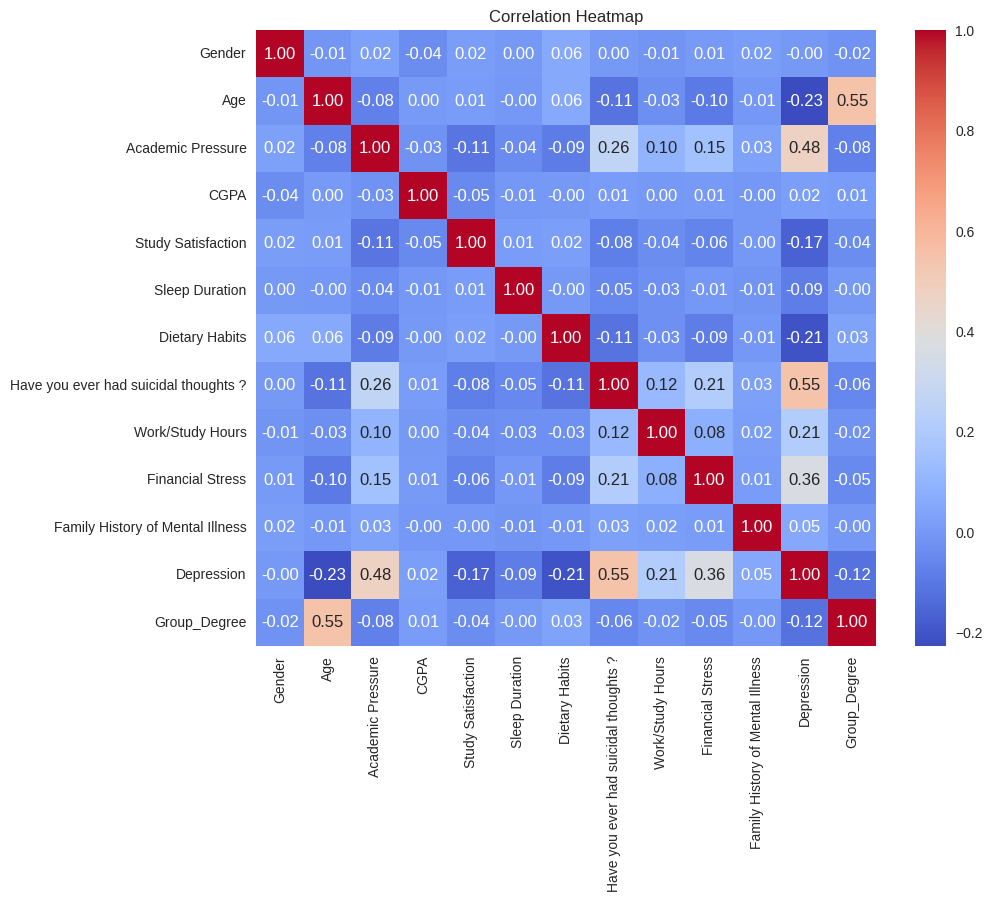

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


The heatmap displays the correlation matrix for various factors, with values ranging from -1 to 1. Here's the interpretation of the key observations:

**Strong Positive Correlation:**
"Age" and "Group_Degree" show a high positive correlation (0.55), indicating older individuals are more likely associated with certain academic groups or degrees.
"Depression" and "Have you ever had suicidal thoughts?" have a strong positive correlation (0.55), suggesting a significant relationship between depression and suicidal thoughts.

**Moderate Positive Correlation**:
"Depression" and "Academic Pressure" (0.48), suggesting academic pressure can contribute to depression.

**Weak or Negligible Correlation:**
Most other variables, such as "Gender" and "CGPA" or "Dietary Habits" and "Sleep Duration," show negligible correlations (close to 0), indicating little to no linear relationship.

**Negative Correlation:**
"Age" and "Depression" (-0.23) have a slight negative correlation, implying that older individuals might experience lower levels of depression.
"Group_Degree" and "Depression" (-0.12) suggest a minor inverse relationship.
This heatmap can be used to identify which factors are most strongly associated, guiding further analysis or interventions for improving mental health outcomes.

### Machine Learning

#### Classfication

In [ ]:
x = df[['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress','Family History of Mental Illness','Group_Degree']]
y = df['Depression']

In [ ]:
# Test Size 20% and Random State 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

X_train shape: (22211, 12)
X_test shape: (5553, 12)


# **Classification With Entrophy**

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(x_test)

In [ ]:
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test,y_pred_en)))

Model accuracy score with criterion entropy: 0.8187


In [ ]:
print("Training set score: {0:0.4f}".format(clf_en.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_en.score(x_test,y_test)))

Training set score: 0.8227
Test set score: 0.8187


[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.978\nsamples = 22211\nvalue = [9192, 13019]'),
 Text(0.25, 0.625, 'x[2] <= 3.5\nentropy = 0.776\nsamples = 8106\nvalue = [6250, 1856]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[9] <= 2.5\nentropy = 0.558\nsamples = 5908\nvalue = [5139, 769]'),
 Text(0.0625, 0.125, 'entropy = 0.308\nsamples = 3011\nvalue = [2845, 166]'),
 Text(0.1875, 0.125, 'entropy = 0.738\nsamples = 2897\nvalue = [2294, 603]'),
 Text(0.375, 0.375, 'x[9] <= 2.5\nentropy = 1.0\nsamples = 2198\nvalue = [1111, 1087]'),
 Text(0.3125, 0.125, 'entropy = 0.884\nsamples = 926\nvalue = [646, 280]'),
 Text(0.4375, 0.125, 'entropy = 0.947\nsamples = 1272\nvalue = [465, 807]'),
 Text(0.75, 0.625, 'x[2] <= 2.5\nentropy = 0.739\nsamples = 14105\nvalue = [2942, 11163]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[9] <= 2.5\nentropy = 1.0\nsamples = 3284\nvalue = [1629, 1655]'),
 Text(0.5625, 0.125, 'entropy = 0.854\nsamples = 1172\nvalue = [845, 327]'),
 Text(0.6875

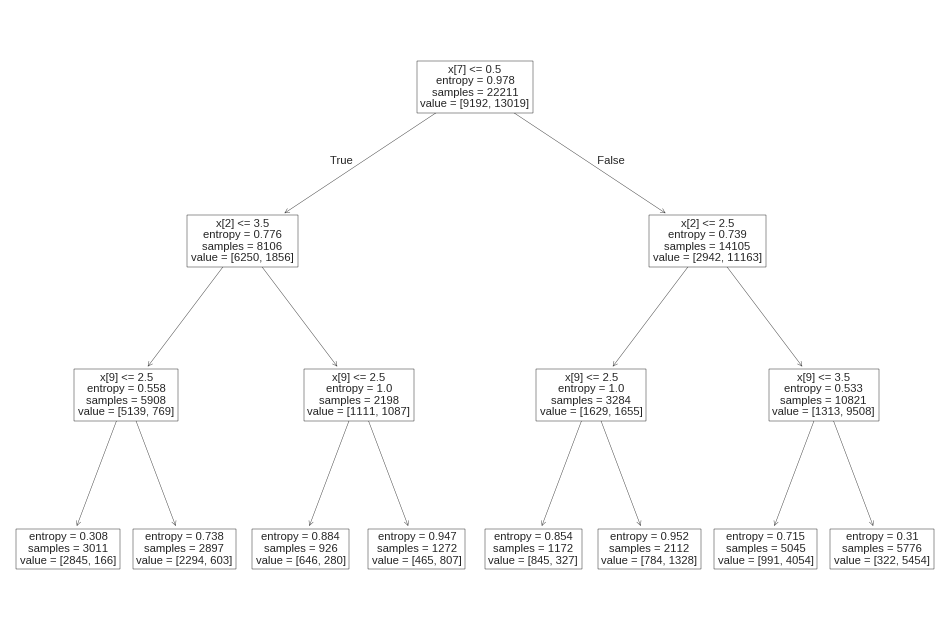

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(x_train,y_train))

In [ ]:
print("Confusion Matrix Entropy")
cm = confusion_matrix(y_test, y_pred_en)
cm


Confusion Matrix Entropy


array([[1683,  642],
       [ 365, 2863]])

In [ ]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_en))

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      2325
           1       0.82      0.89      0.85      3228

    accuracy                           0.82      5553
   macro avg       0.82      0.81      0.81      5553
weighted avg       0.82      0.82      0.82      5553



The classification report summarizes the performance of a classification model using metrics like precision, recall, F1-score, and support. Here's the interpretation:

**Class 0:**

Precision: 0.82, meaning 82% of instances predicted as class 0 are actually class 0.
Recall: 0.72, indicating the model correctly identifies 72% of actual class 0 instances.
F1-Score: 0.77, a harmonic mean of precision and recall, showing balanced performance.
Support: 2,325, the total number of true instances of class 0.

**Class 1:**

Precision: 0.82, meaning 82% of instances predicted as class 1 are correct.
Recall: 0.89, indicating the model correctly identifies 89% of actual class 1 instances.
F1-Score: 0.85, showing better performance for this class compared to class 0.
Support: 3,228, the total number of true instances of class 1.

**Overall Metrics:**

Accuracy: 0.82, meaning the model correctly classified 82% of all instances.
Macro Average: Precision, recall, and F1-score are averaged across classes equally, giving values of 0.82, 0.81, and 0.81, respectively. Weighted Average: These metrics are averaged based on the number of true instances for each class, resulting in precision, recall, and F1-score of 0.82.

**Conclusion:**
The entropy-based model shows balanced precision (82%) for both classes, but recall is significantly higher for class 1 (89%) compared to class 0 (72%), leading to a stronger F1-score for class 1 (0.85) than class 0 (0.77). This indicates the model performs better in identifying class 1 instances, while class 0 recall needs improvement. To enhance overall performance, efforts should focus on increasing recall for class 0, which could involve balancing the dataset, fine-tuning thresholds, or experimenting with other algorithms. Additionally, analyzing patterns in misclassified class 0 instances could provide valuable insights to improve model predictions.

# **Classification With Gini**

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(x_test)

In [ ]:
print("Model accuracy score with criterion gini: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini: 0.8187


In [ ]:
print("Training set score: {0:0.4f}".format(clf_gini.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_gini.score(x_test,y_test)))

Training set score: 0.8227
Test set score: 0.8187


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.485\nsamples = 22211\nvalue = [9192, 13019]'),
 Text(0.25, 0.625, 'x[2] <= 3.5\ngini = 0.353\nsamples = 8106\nvalue = [6250, 1856]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[9] <= 3.5\ngini = 0.226\nsamples = 5908\nvalue = [5139, 769]'),
 Text(0.0625, 0.125, 'gini = 0.143\nsamples = 4124\nvalue = [3805, 319]'),
 Text(0.1875, 0.125, 'gini = 0.377\nsamples = 1784\nvalue = [1334, 450]'),
 Text(0.375, 0.375, 'x[9] <= 2.5\ngini = 0.5\nsamples = 2198\nvalue = [1111, 1087]'),
 Text(0.3125, 0.125, 'gini = 0.422\nsamples = 926\nvalue = [646, 280]'),
 Text(0.4375, 0.125, 'gini = 0.464\nsamples = 1272\nvalue = [465, 807]'),
 Text(0.75, 0.625, 'x[2] <= 2.5\ngini = 0.33\nsamples = 14105\nvalue = [2942, 11163]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[9] <= 2.5\ngini = 0.5\nsamples = 3284\nvalue = [1629, 1655]'),
 Text(0.5625, 0.125, 'gini = 0.402\nsamples = 1172\nvalue = [845, 327]'),
 Text(0.6875, 0.125, 'gini = 0.467\nsamples = 

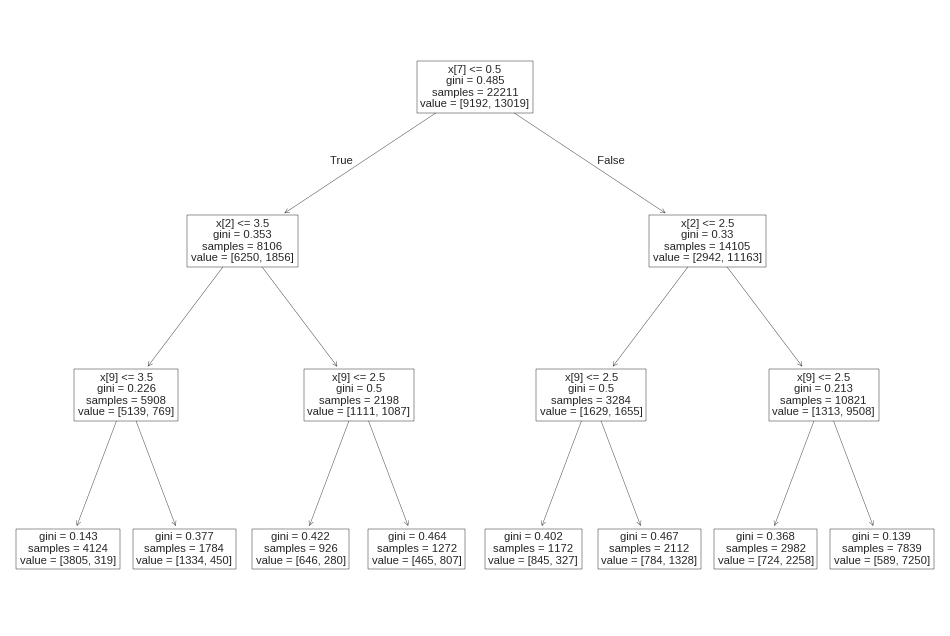

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [ ]:
print("Confusion Matrix Gini")
cy = confusion_matrix(y_test, y_pred_gini)
cy

Confusion Matrix Gini


array([[1683,  642],
       [ 365, 2863]])

In [ ]:
print("Classification Report gini")
print(classification_report(y_test, y_pred_gini))

Classification Report gini
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      2325
           1       0.82      0.89      0.85      3228

    accuracy                           0.82      5553
   macro avg       0.82      0.81      0.81      5553
weighted avg       0.82      0.82      0.82      5553



The classification report evaluates the performance of a model using the Gini index for splitting criteria. Here's the interpretation and insights:

**Class 0:**
Precision (0.82): 82% of the instances predicted as class 0 are correct.
Recall (0.72): The model correctly identifies 72% of the actual class 0 instances.
F1-Score (0.77): Balances precision and recall, reflecting the model's performance for class 0.
Support (2,325): Total true instances of class 0 in the dataset.

**Class 1:**
Precision (0.82): 82% of the instances predicted as class 1 are correct.
Recall (0.89): The model correctly identifies 89% of the actual class 1 instances.
F1-Score (0.85): Higher than class 0, indicating better performance for class 1.
Support (3,228): Total true instances of class 1 in the dataset.

**Overall Metrics:**
Accuracy (0.82): The model correctly classifies 82% of all instances.
Macro Average:
Precision, recall, and F1-score (0.82, 0.81, 0.81) are averaged equally across both classes.
Weighted Average:
These metrics are averaged based on the support for each class, yielding precision, recall, and F1-score of 0.82.

**Conclusion :** The model demonstrates balanced performance, with precision consistently at 82% for both classes, but recall is notably higher for class 1 (89%) compared to class 0 (72%), indicating better identification of class 1 instances. This results in a higher F1-score for class 1 (0.85) than class 0 (0.77), suggesting room for improvement in class 0 detection. To enhance performance, focus on increasing recall for class 0 by balancing the dataset, tuning thresholds, or exploring alternative algorithms. Additionally, analyzing misclassified instances and incorporating features that better differentiate class 0 could further optimize the model's effectiveness.

#### Clustering

In [ ]:
#Academic Pressure, Have you ever had suicidal thoughts, Financial Stress
df_clust = df[['Academic Pressure','Have you ever had suicidal thoughts ?','Depression']]
df_clust.head()

,Academic Pressure,Have you ever had suicidal thoughts ?,Depression
0,5.0,1,1
1,2.0,0,0
2,3.0,0,0
3,3.0,1,1
4,4.0,1,0


In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clust)
df_scaled = pd.DataFrame(df_scaled, columns=df_clust.columns)
df_scaled.head()

,Academic Pressure,Have you ever had suicidal thoughts ?,Depression
0,1.00,1.0,1.0
1,0.25,0.0,0.0
2,0.50,0.0,0.0
3,0.50,1.0,1.0
4,0.75,1.0,0.0


#### K-Means

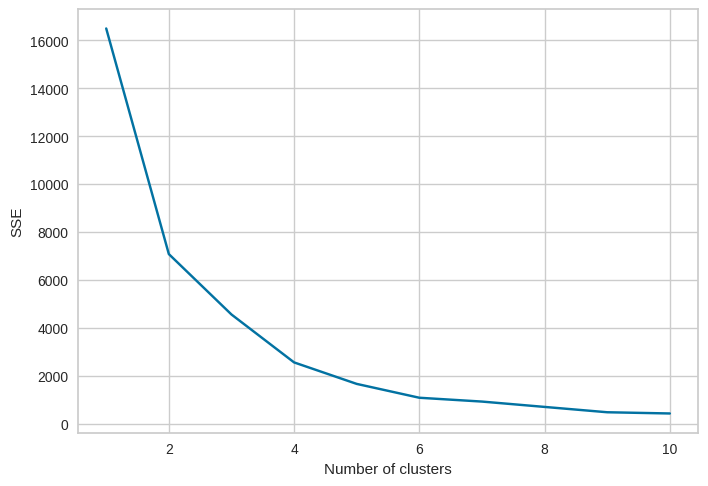

In [ ]:

# set the parameter for evaluating K
sse=[]
# check the inertia for each K
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',max_iter=500,random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# After some consideration from testing the cluster's numbers, We concluded to use 6 because it distributed the data pretty well than the others
kmeans = KMeans(n_clusters=6, init='random', max_iter=500, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)


In [ ]:
# Inverse transform the scaled data to get the original values
dfinverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
dfinverse['KMeans'] = y_pred
dfinverse.head()

,Academic Pressure,Have you ever had suicidal thoughts ?,Depression,KMeans
0,5.0,1.0,1.0,3
1,2.0,0.0,0.0,0
2,3.0,0.0,0.0,4
3,3.0,1.0,1.0,1
4,4.0,1.0,0.0,5


In [ ]:
silhouette_avg = silhouette_score(df_scaled, y_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7006728085557837


In [ ]:
# count data from each cluster
cluster_counts = dfinverse['KMeans'].value_counts().sort_index()
cluster_counts.name = 'KMeans'
cluster_counts


,KMeans
KMeans,
0,4432
1,5985
2,2361
3,7901
4,3406
5,3679


In [ ]:
cluster_summary = dfinverse.groupby('KMeans').agg({
    'Academic Pressure': ['mean', 'std', 'min', 'max'],
    'Have you ever had suicidal thoughts ?': ['mean'],  # Proportion of Yes (mean)
    'Depression': ['mean'],  # Proportion of Yes (mean)
}).reset_index()

# Transpose agar hasilnya menjadi vertikal (baris) dan klaster menjadi kolom
cluster_summary = cluster_summary.T

# Ubah nama klaster menjadi 'Cluster 0', 'Cluster 1', dll.
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]
cluster_summary.columns.name = 'KMeans'
cluster_summary = cluster_summary.round(2)


# Menampilkan hasil
cluster_summary


KMeans                                      Cluster 0  Cluster 1  Cluster 2  \
KMeans                                           0.00       1.00       2.00   
Academic Pressure                     mean       1.40       2.52       3.71   
                                      std        0.49       0.71       1.23   
                                      min        1.00       1.00       1.00   
                                      max        2.00       3.00       5.00   
Have you ever had suicidal thoughts ? mean       0.00       1.00       0.00   
Depression                            mean       0.00       1.00       1.00   

KMeans                                      Cluster 3  Cluster 4  Cluster 5  
KMeans                                           3.00       4.00       5.00  
Academic Pressure                     mean       4.58       3.59       2.39  
                                      std        0.49       0.78       1.25  
                                      min        4.00       3.00       1.00  
                                      max        5.00       5.00       5.00  
Have you ever had suicidal thoughts ? mean       1.00       0.00       1.00  
Depression                            mean       1.00       0.00       0.00

#### **Conclusion**

**Cluster 0: Low Academic Pressure, Stable Mental Health**

Academic Pressure: Very low (Mean = 1.40, Range = 1.0 to 2.0).

Mental Health: No suicidal thoughts or depression (Proportions = 0.0 for both).

Conclusion:
This group represents individuals under minimal academic stress and shows excellent mental health stability.
Likely to require minimal intervention, but continued support to maintain well-being is advisable.

---

**Cluster 1: Moderate Academic Pressure, High Mental Health Risk**

Academic Pressure: Moderate (Mean = 2.52, Range = 1.0 to 3.0).

Mental Health: High levels of suicidal thoughts and depression (Proportions = 1.0 for both).

Conclusion:
This cluster reflects individuals experiencing moderate academic pressure but severe mental health challenges.
Interventions are urgently needed, focusing on mental health support, stress management, and counseling.

---

**Cluster 2: High Academic Pressure, Depression Present**

Academic Pressure: High (Mean = 3.71, Range = 1.0 to 5.0).

Mental Health: No suicidal thoughts but a high depression proportion (Proportion = 1.0).

Conclusion:
This group indicates individuals with high academic demands who may be internalizing their struggles, resulting in depression without suicidal ideation.
Interventions should address coping mechanisms and provide tools for handling academic stress effectively.

---

**Cluster 3: Very High Academic Pressure, Severe Mental Health Risk**

Academic Pressure: Very high (Mean = 4.58, Range = 4.0 to 5.0).

Mental Health: Both suicidal thoughts and depression are present (Proportions = 1.0 for both).

Conclusion:
This cluster represents the most critical group, with extremely high academic pressure and severe mental health risks.
Immediate and comprehensive support, including academic adjustments, counseling, and mental health care, is essential.

---

**Cluster 4: High Academic Pressure, Resilient Mental Health**

Academic Pressure: High (Mean = 3.59, Range = 3.0 to 5.0).

Mental Health: No suicidal thoughts or depression (Proportions = 0.0 for both).

Conclusion:
Individuals in this cluster are high performers under significant academic pressure but show strong mental health resilience.
They may benefit from programs to sustain their positive coping strategies and prevent future burnout.

---

**Cluster 5: Moderate Academic Pressure, Suicidal Thoughts but No Depression**

Academic Pressure: Moderate (Mean = 2.39, Range = 1.0 to 5.0).

Mental Health: Suicidal thoughts present (Proportion = 1.0), but no depression (Proportion = 0.0).

Conclusion:
This cluster is unique, with individuals showing signs of distress (suicidal thoughts) without diagnosed depression.
Targeted interventions should explore underlying causes, such as social or personal factors, alongside academic stress.

#### Hierarchical Clustering

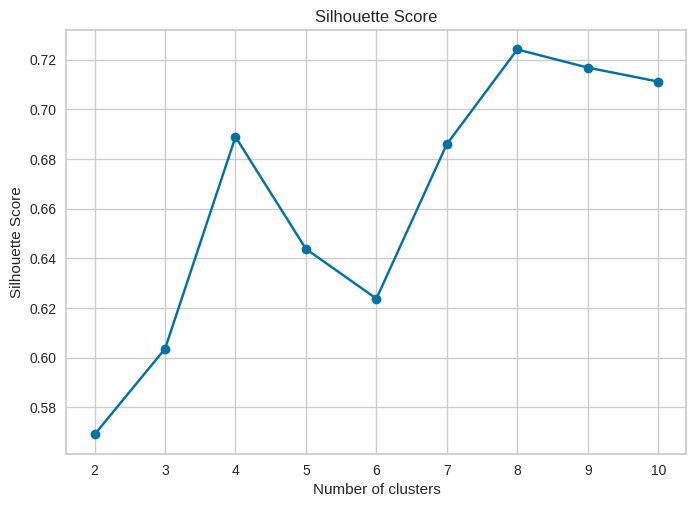

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    hierarchical = fcluster(linkage(df_scaled, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_scaled, hierarchical)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.title('Silhouette Score')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
linkage_methods = ['ward', 'single', 'complete', 'average']
silhouette_scores = {}

for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=8, linkage=method)
    hc_labels = hc.fit_predict(df_scaled)
    hc_silhouette = silhouette_score(df_scaled, hc_labels)
    silhouette_scores[method] = hc_silhouette
    print(f"Silhouette Score Hierarchical Clustering ({method}): {hc_silhouette}")


Silhouette Score Hierarchical Clustering (ward): 0.7240508467969227
Silhouette Score Hierarchical Clustering (single): 0.698725215344484
Silhouette Score Hierarchical Clustering (complete): 0.6140238697297304
Silhouette Score Hierarchical Clustering (average): 0.6140238697297304


In [ ]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)

In [ ]:

# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
dfinverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
dfinverse['KMeans'] = y_pred
dfinverse['Agglo'] = y_hc

# show the df
dfinverse.head()


,Academic Pressure,Have you ever had suicidal thoughts ?,Depression,KMeans,Agglo
0,5.0,1.0,1.0,3,4
1,2.0,0.0,0.0,0,2
2,3.0,0.0,0.0,4,2
3,3.0,1.0,1.0,1,3
4,4.0,1.0,0.0,5,0


In [ ]:
cluster_summary = dfinverse.groupby('Agglo').agg({
    'Academic Pressure': ['mean', 'std', 'min', 'max'],
    'Have you ever had suicidal thoughts ?': ['mean'],  # Proportion of Yes (mean)
    'Depression': ['mean'],  # Proportion of Yes (mean)
}).reset_index()
cluster_summary = cluster_summary.T
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]
cluster_summary.columns.name = 'Agglo'
cluster_summary = cluster_summary.round(2)

cluster_summary

Agglo                                       Cluster 0  Cluster 1  Cluster 2  \
Agglo                                            0.00       1.00       2.00   
Academic Pressure                     mean       2.39       3.71       2.53   
                                      std        1.25       1.23       0.50   
                                      min        1.00       1.00       2.00   
                                      max        5.00       5.00       3.00   
Have you ever had suicidal thoughts ? mean       1.00       0.00       0.00   
Depression                            mean       0.00       1.00       0.00   

Agglo                                       Cluster 3  Cluster 4  Cluster 5  \
Agglo                                            3.00        4.0       5.00   
Academic Pressure                     mean       3.46        5.0       4.44   
                                      std        0.50        0.0       0.50   
                                      min        3.00        5.0       4.00   
                                      max        4.00        5.0       5.00   
Have you ever had suicidal thoughts ? mean       1.00        1.0       0.00   
Depression                            mean       1.00        1.0       0.00   

Agglo                                       Cluster 6  Cluster 7  
Agglo                                            6.00        7.0  
Academic Pressure                     mean       1.63        1.0  
                                      std        0.48        0.0  
                                      min        1.00        1.0  
                                      max        2.00        1.0  
Have you ever had suicidal thoughts ? mean       1.00        0.0  
Depression                            mean       1.00        0.0

In [ ]:

# Menghitung jumlah data di setiap klaster
cluster_counts = dfinverse['Agglo'].value_counts().sort_index()
cluster_counts.name = 'Agglo'
cluster_counts


,Agglo
Agglo,
0,3679
1,2361
2,3774
3,7250
4,4556
5,1402
6,2080
7,2662


#### **Conclusion**

**Cluster 0: Moderate Academic Pressure, High Mental Health Risk**
- **Academic Pressure**: Moderate (Mean = 2.39, Std = 1.25, Range = 1.0 to 5.0).
- **Mental Health**: Suicidal thoughts are prevalent (Proportion = 1.0), but no depression (Proportion = 0.0).
- **Conclusion**: This cluster represents individuals experiencing moderate academic pressure but struggling with suicidal thoughts. Interventions should focus on addressing suicidal ideation, stress management, and emotional support.

---

**Cluster 1: High Academic Pressure, Severe Depression**
- **Academic Pressure**: High (Mean = 3.71, Std = 1.23, Range = 1.0 to 5.0).
- **Mental Health**: No suicidal thoughts (Proportion = 0.0), but severe depression (Proportion = 1.0).
- **Conclusion**: This cluster reflects individuals with high academic demands and severe depression. They may internalize their struggles, and interventions should focus on providing coping mechanisms and emotional support.

---

**Cluster 2: Moderate Academic Pressure, Stable Mental Health**
- **Academic Pressure**: Moderate (Mean = 2.53, Std = 0.50, Range = 2.0 to 3.0).
- **Mental Health**: No suicidal thoughts or depression (Proportions = 0.0 for both).
- **Conclusion**: This group demonstrates resilience under moderate academic demands. Minimal intervention may be required, but resources for stress management should still be made available.

---

**Cluster 3: High Academic Pressure, Severe Mental Health Challenges**
- **Academic Pressure**: High (Mean = 3.46, Std = 0.50, Range = 3.0 to 4.0).
- **Mental Health**: Both suicidal thoughts and depression are prevalent (Proportions = 1.0 for both).
- **Conclusion**: This cluster represents individuals facing significant academic pressure and severe mental health challenges. Immediate intervention is crucial, including academic adjustments and comprehensive mental health support.

---

**Cluster 4: Extreme Academic Pressure, Severe Mental Health Challenges**
- **Academic Pressure**: Extreme (Mean = 5.0, Std = 0.0, Range = 5.0 to 5.0).
- **Mental Health**: Both suicidal thoughts and depression are prevalent (Proportions = 1.0 for both).
- **Conclusion**: This cluster represents individuals under the highest academic stress with severe mental health risks. Urgent and comprehensive support is needed, including crisis intervention and a review of academic workloads.

---

**Cluster 5: High Academic Pressure, Stable Mental Health**
- **Academic Pressure**: High (Mean = 4.44, Std = 0.50, Range = 4.0 to 5.0).
- **Mental Health**: No suicidal thoughts or depression (Proportions = 0.0 for both).
- **Conclusion**: This group appears to manage high academic demands effectively. While mental health is stable, periodic monitoring and stress management resources may help maintain this balance.

---

**Cluster 6: Low Academic Pressure, Suicidal Thoughts Present**
- **Academic Pressure**: Low (Mean = 1.63, Std = 0.48, Range = 1.0 to 2.0).
- **Mental Health**: Suicidal thoughts are prevalent (Proportion = 1.0), but no depression (Proportion = 0.0).
- **Conclusion**: Despite low academic demands, this group exhibits suicidal ideation, suggesting that factors beyond academics may contribute to their struggles. Emotional support and further investigation into external stressors are recommended.

---

**Cluster 7: Very Low Academic Pressure, Stable Mental Health**
- **Academic Pressure**: Very low (Mean = 1.0, Std = 0.0, Range = 1.0 to 1.0).
- **Mental Health**: No suicidal thoughts or depression (Proportions = 0.0 for both).
- **Conclusion**: This cluster represents individuals with minimal academic stress and excellent mental health stability. Continued support to maintain their well-being is advisable.

### Hierarchical Visualization

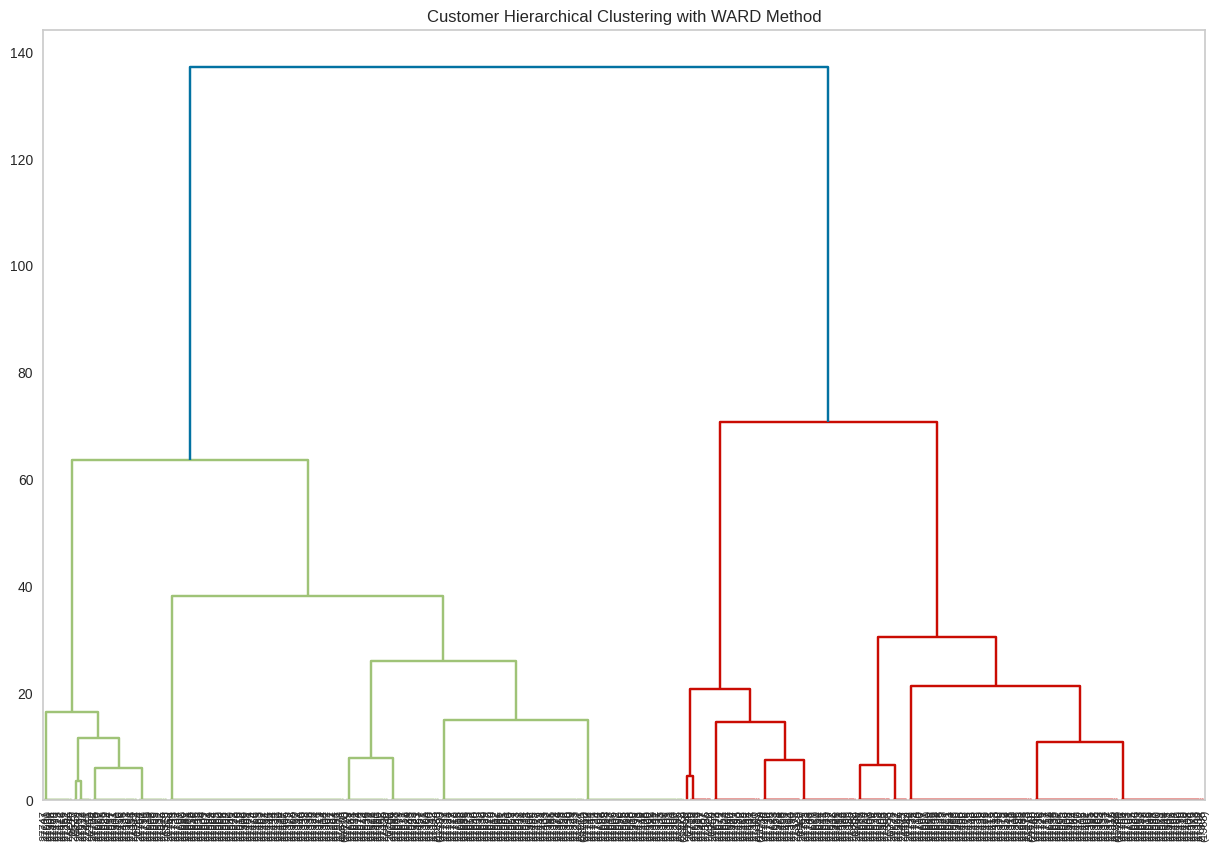

In [ ]:
# Ward Method
Z = linkage(df_scaled, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8,truncate_mode='lastp', p=500) # Show only the last 100 merged clusters
plt.title('Hierarchical Clustering with WARD Method')
plt.grid(False)
plt.show()